# INSPER - Big Data e Computação em Nuvem
# Aula 1 - Introdução à Computação em Larga Escala, Dask

#### *Prof. Michel Fornaciali*
#### *Profa. Thanuci Silva*

Vantagens de se usar Dask:

1. **Fácil de usar**: É projetado para usar interfaces familiares como Numpy, Pandas e Scikit-Learn, permitindo que os usuários escalem suas operações sem a necessidade de aprender um novo framework completamente.

2. **Proporciona escalabilidade**: Permite a execução tarefas em grande escala, dividindo-os em tarefas menores e gerenciáveis, que são então executadas em paralelo em vários núcleos ou distribuídas entre várias máquinas.

[Link para a documentação](https://docs.dask.org/en/latest/)

### Instalação da biblioteca Dask

`!pip install dask[complete]`

In [ ]:
!pip install dask[complete]

### Instalação da biblioteca Graphviz

Para visualizar o grafos de execução do Dask, é necessário a biblioteca Graphivz.

No Google Colab, Graphviz já vem instalado por padrão. Caso contrário, utilize: `!pip install graphviz`

### Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from dask import delayed
from time import sleep

Vamos iniciar fazendo duas funcões: inc e add, que irão levar pelo menos 1 segundo em sua execução, com uso da função sleep

In [ ]:
def inc(x):
  sleep(1)
  return x+1

def add(x, y):
  sleep(1)
  return x+y

Agora vamos ver o tempo de execução. Para isso use o magic command %%time

# Usando o Dask

Como esperado, os códigos demoraram três segundos, pois cada linha de execução levou em torno de 1 segundo para concluir, uma vez que fizemos uso da função sleep em suas definições.

De todo modo, é possível pensar em paralelizar?

Consegue pensar nas partes que podem ser paralizadas e na parte sequêncial?

De fato, poderíamos fazer em paralelo a atribuição de `x` e a atribuição de `y` e, na sequencia, somar `x` e `y`, armazenando em `z`. `z` é a parte sequencial e ela limita a nossa execução em paralelo.

A biblioteca **dask** possui mecanismos interessantes de paralelizar a execução de código, otimizando sempre que possível. Neste caso, vamos usar a função *delayed* da biblioteca para informar que queremos aplicar *lazy evaluation*

A bilioteca nos permite visualizar um grafo da execução para este cenário.

Observe que há o paralelismo ao invocar a função *inc* simultaneamente e, posteriormente, há a invocação da função *add*.

Para executar esse grafo, faça uso da função *compute*

Excelente! Agora conseguimos executar em 2 segundos!

## E se fosse um laço?

Será que agora conseguimos fazer isso para um laço? Veja o código abaixo:

## E com o dask?

Levamos quase 8 segundos para incrementar cada elemento da lista e somá-los. Mas isso poderia ser paralelizado, concorda? Vamos modificar o código e aplicar a função *delayed*:

# Comparando com o Pandas - Voos NYC

In [ ]:
!wget https://storage.googleapis.com/dask-tutorial-data/nycflights.tar.gz
!mkdir data
!tar -xvzf nycflights.tar.gz -C data

In [ ]:
import glob

filenames = glob.glob("data/nycflights/*.csv")

for f in filenames:
  print(f)

Vamos descobrir o maior atraso de todos os voos listados (DepDelay).

Usando delayed() do dask para obter a mesma informação.

# Usando dask puro para obter o valor máximo de atraso.

Vamos carregar nossos dados diretamente como Dask Dataframe (ddf)

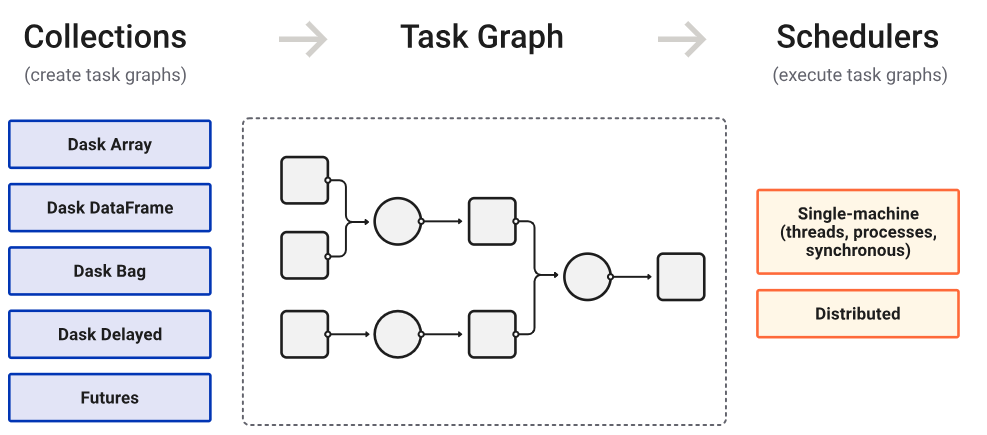

In [ ]:
import dask.dataframe as ddf

In [ ]:
%%time
df = ddf.read_csv("data/nycflights/*.csv", dtype={"TailNum": str,
                         "CSRElapsedTime": int,
                         "Cancelled": bool}, assume_missing=True)


In [ ]:
df.DepDelay.max().visualize()

## Obtendo voos não cancelados

Podemos compartilhar resultados intermediários. Ex: cálculo de média e desvio padrão de atrasos para voos não cancelados.

In [ ]:
df = ddf.read_csv("data/nycflights/*.csv", dtype={"TailNum": str,
                         "CSRElapsedTime": int,
                         "Cancelled": bool}, assume_missing=True)

In [ ]:
import dask

Agora é com vocês!

Sabendo da interface existente entre Dask, Pandas, NumPy e ScikitLearn façam, a partir do Dataframe de vôos não cancelados:


1.   Uma filtragem de Dados: selecione voos que partiram de "JFK" e tiveram como destino "LAX".

2.   Agrupamento e Agregação: a partir dos dados filtrados na etapa 1, agrupe os dados por ano e mês do voo, e calcule o número total de vôos por mês.

3.   Plote um gráfico que seja interessante para mostrar distribuição do número de voos por ano e por mês. Ps.: Substitua os números dos meses por seus respectivos nomes.

4.   A partir da visualização gerada e no período de tempo considerado, qual o mês onde aparentemente o número de vôos é maior?

5. Faça um gráfico de barras com a contagem de número de voos (origem) por aeroporto. Qual aeroporto de NY tem maior número de departures?

6. Faça um gráfico de dispersão comparando a distância do vôo com o atraso no pouso. Observando esse gráfico, quais são as conclusões que podemos tirar a respeito de:
 - Qualidade da informação
 - Pipeline de execução






